# Import

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from tensorflow.keras import layers
from tensorflow import keras as keras
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten, Dropout, Dense  
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt
from pandas import read_excel, DataFrame, Series
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,  mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.4 MB/s eta 0:00:00
2.11.0


In [ ]:
# Подлючаем GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузка 1-ого датасета
df_bp = pd.read_excel('/content/drive/MyDrive/DS/X_bp.xlsx')
df_bp.shape

(1023, 11)

In [ ]:
df_bp.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
# Столбец: Unnamed: 0 удаляем, так как дублирует нумерацию строк
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
# Размерность
df_bp.shape

(1023, 10)

In [ ]:
# Загрузка 2-ого датасета
df_nup = pd.read_excel('/content/drive/MyDrive/DS/X_nup.xlsx')
df_nup.shape

(1040, 4)

In [ ]:
df_nup.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0
3,3,0,5.0,47.0
4,4,0,5.0,57.0


In [ ]:
# Столбец: Unnamed: 0 удаляем, так как дублирует нумерацию строк
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


In [ ]:
# Размерность
df_nup.shape

(1040, 3)

In [ ]:
# У 2-х датасетов различный объём строк, объединяем их по индексу в единый набор данных по типу INNER
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head().T

,0,1,2,3,4
Соотношение матрица-наполнитель,1.857143,1.857143,1.857143,1.857143,2.771331
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
"модуль упругости, ГПа",738.736842,738.736842,738.736842,738.736842,753.000000
"Количество отвердителя, м.%",30.000000,50.000000,49.900000,129.000000,111.860000
"Содержание эпоксидных групп,%_2",22.267857,23.750000,33.000000,21.250000,22.267857
"Температура вспышки, С_2",100.000000,284.615385,284.615385,300.000000,284.615385
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000


In [ ]:
# Размерность объединённого датасета
df.shape

(1023, 13)

In [ ]:
# Начало датафрейма объединённого датасета
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [ ]:
# Смотрим типы данных объединённого датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [ ]:
# Найдём уникальные значения
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [ ]:
df['Угол нашивки, град'].nunique()

2

In [ ]:
# Так,как уникальных значений 2, тогда преобразуем 'Угол нашивки, град' в 0 и 1 (integer), изменив название столбца на 'Угол нашивки'
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [ ]:
# Преобразуем нумерацию в integer
df.index = df.index.astype('int')

In [ ]:
# При необходимости результат сохраняем
# df.to_excel('/content/drive/MyDrive/result/result.xlsx')

In [ ]:
# Описательная статистика
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


In [ ]:
# Выведем транспонированную матрицу
z = df.describe()
z.T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


Описательная статистика:
* count - количество значений
* mean - среднее значение
* std - стандартное отклонение
* min - минимум
* 25% - верхнее значение первого квартиля
* 50% - медиана
* 75% - верхнее значение третьего квартиля
* max - максимум

In [ ]:
# Смотрим пропуски
df.isna().sum().sort_values()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет

<Axes: >

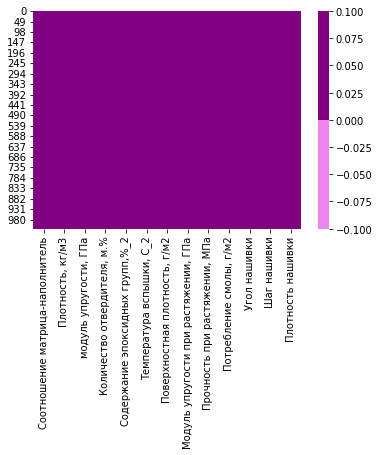

In [ ]:
# Тепловая карта
cols = df.columns
colours = ['#EE82EE', '#800080'] 
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colours))

Фиолетовый темнее-пропусков нет

In [ ]:
df.duplicated().sum()

0

дубликатов нет

In [ ]:
# Выведем схожие показатели
mean_and_50 = df.describe()
mean_and_50.loc[['mean', '50%']]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920


In [ ]:
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки                               0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

Среднее значение

In [ ]:
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки                               0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

Медианное значение

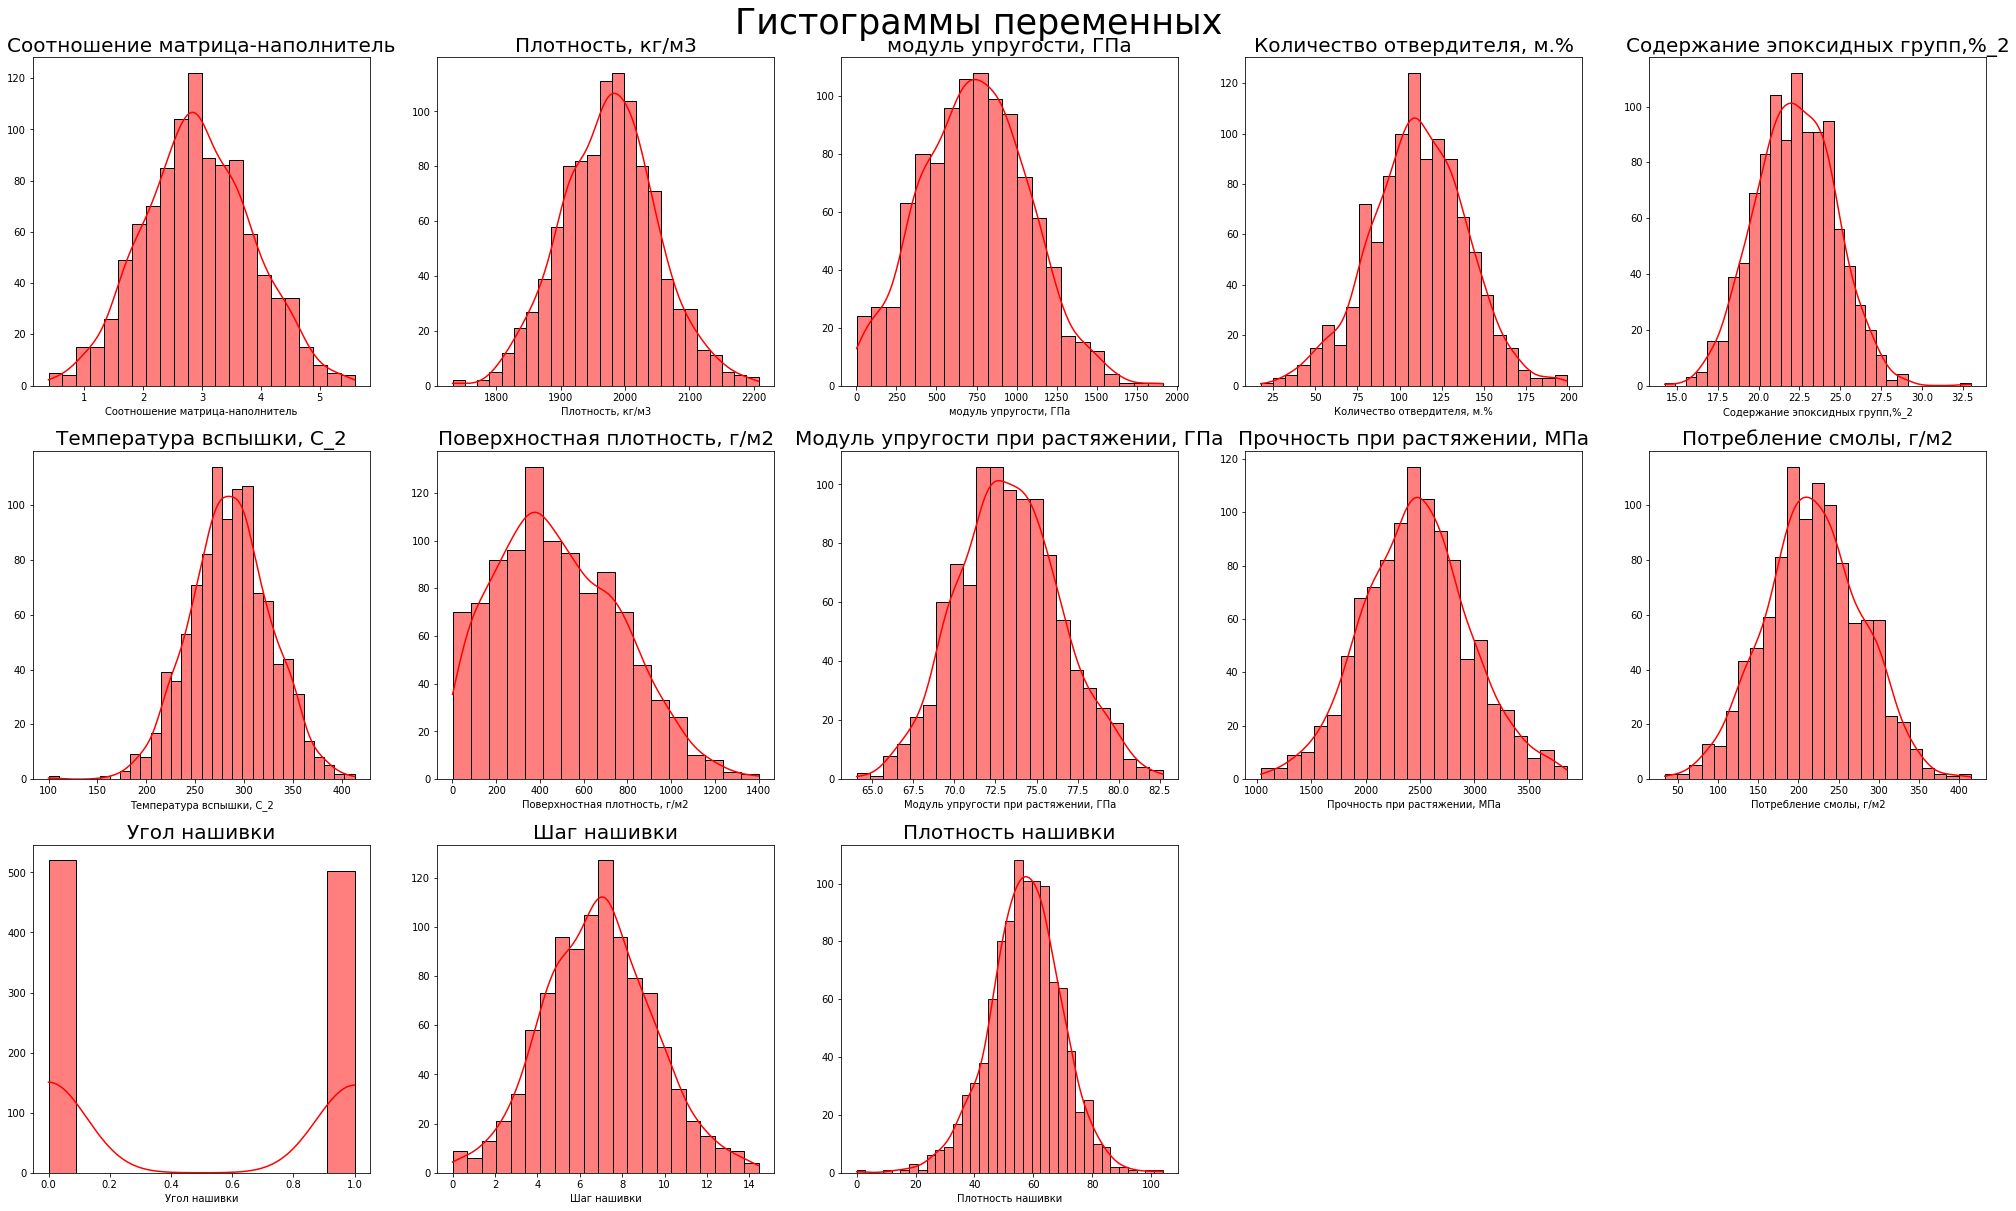

In [ ]:
# Гистограммы распределения
# Введём переменную названия столбцов гистограммы
df.columns
column_names = df.columns
a = 5 # строки
b = 5 # столбцы
c = 1 # инициализация plot counter
plt.figure(figsize = (35,35))
plt.suptitle('Гистограммы переменных',  y = 0.9, fontsize = 35)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.histplot(data = df[col], kde=True, color = "red")
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1

Наблюдаются выбросы выходят за линию гауссианы. Нормальное распределение данных, за исключением стобца "Угол нашивки" имеет 2 значения.

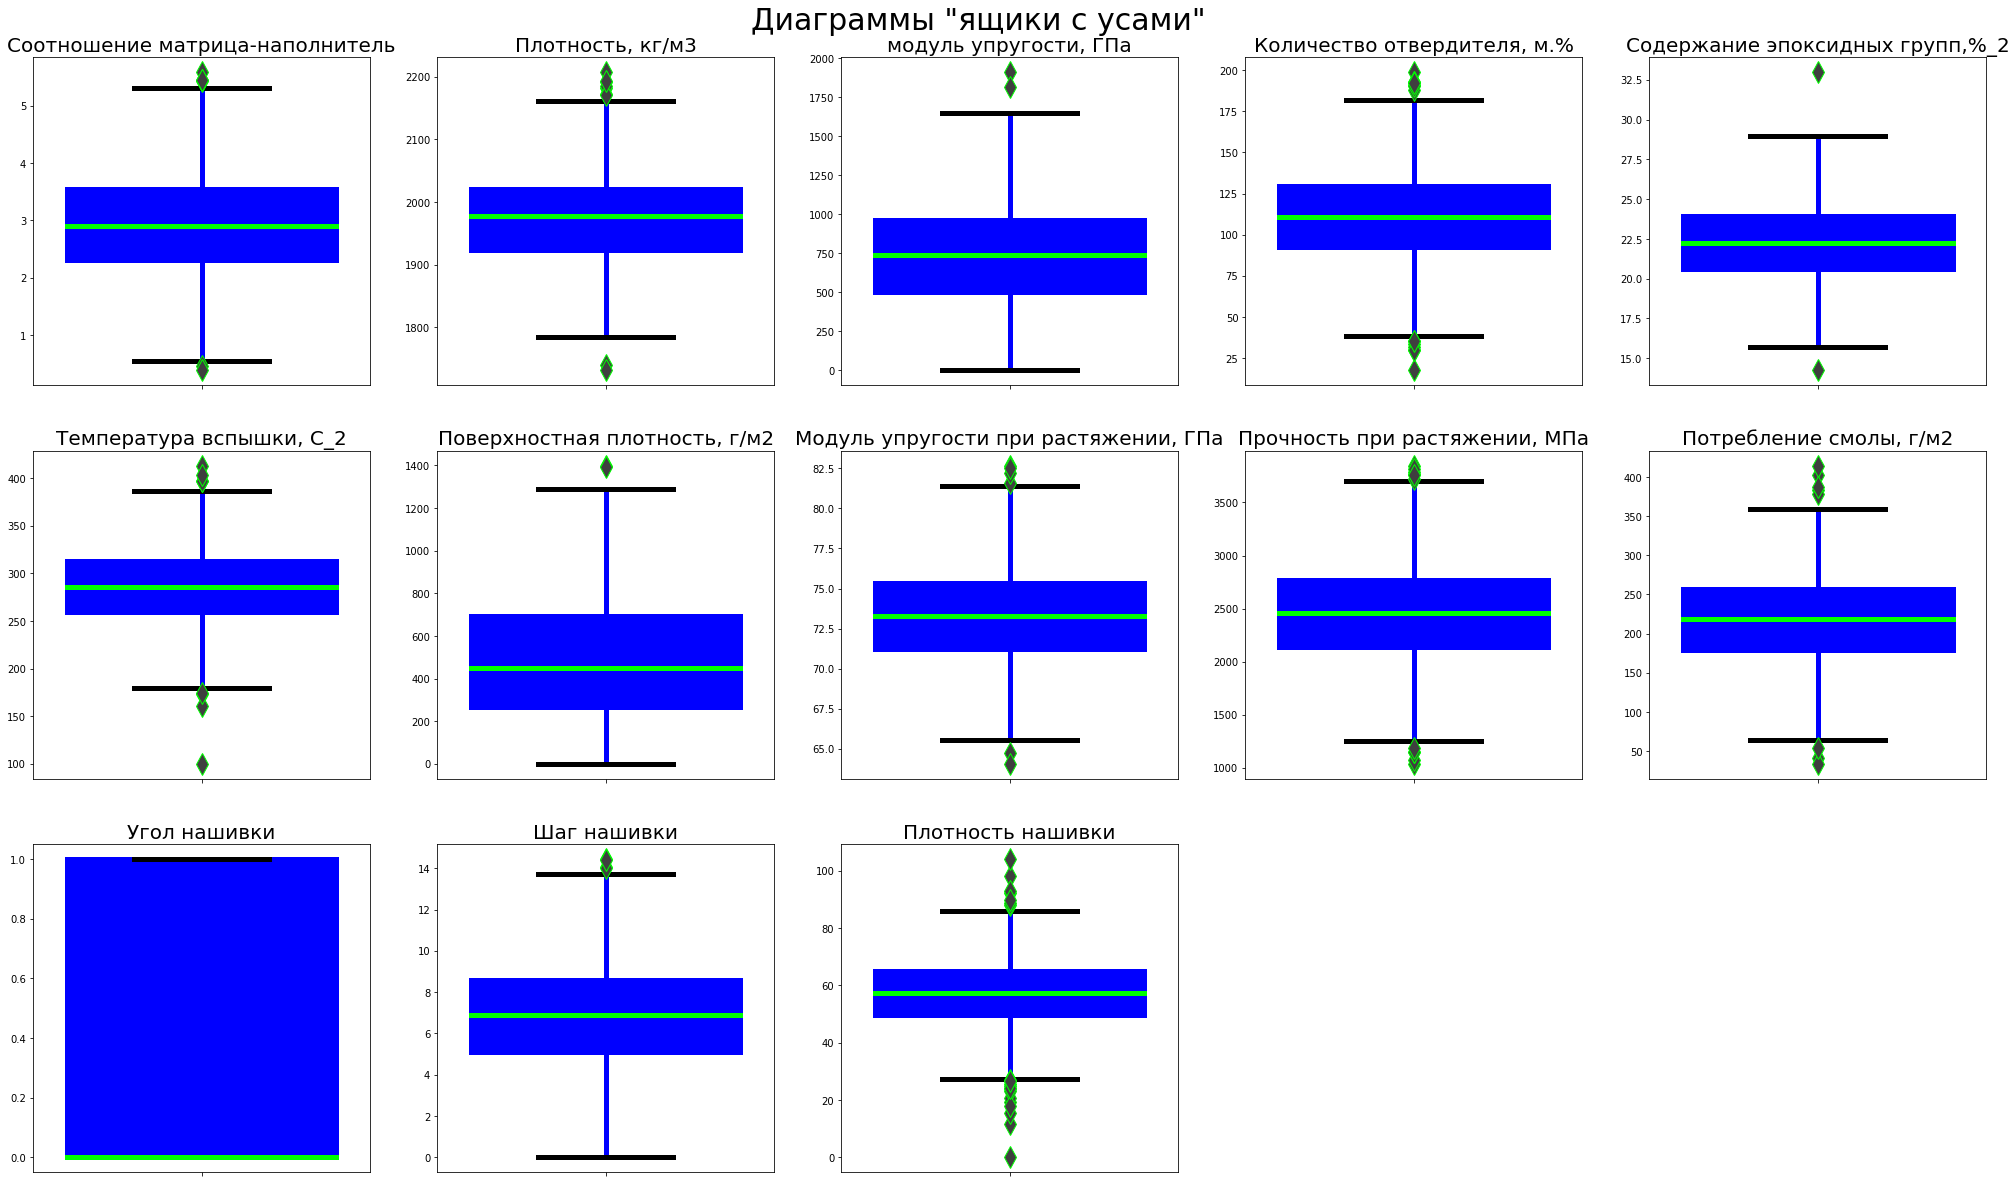

In [ ]:
# Ящики с усами
a = 5 # строки
b = 5 # столбцы
c = 1 # инициализация plot counter
plt.figure(figsize = (35,35))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9,
             fontsize = 30)
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y = df[col],
                fliersize = 15,
                linewidth = 5,
                boxprops = dict(facecolor = 'y', color = 'b'),
                medianprops = dict(color = 'lime'),
                whiskerprops = dict(color="b"),
                capprops = dict(color = "black"),
                flierprops = dict(color="y", markeredgecolor = "lime"))
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c += 1

Выбросы за пределами "усов", исключением является "Угол нашивки"

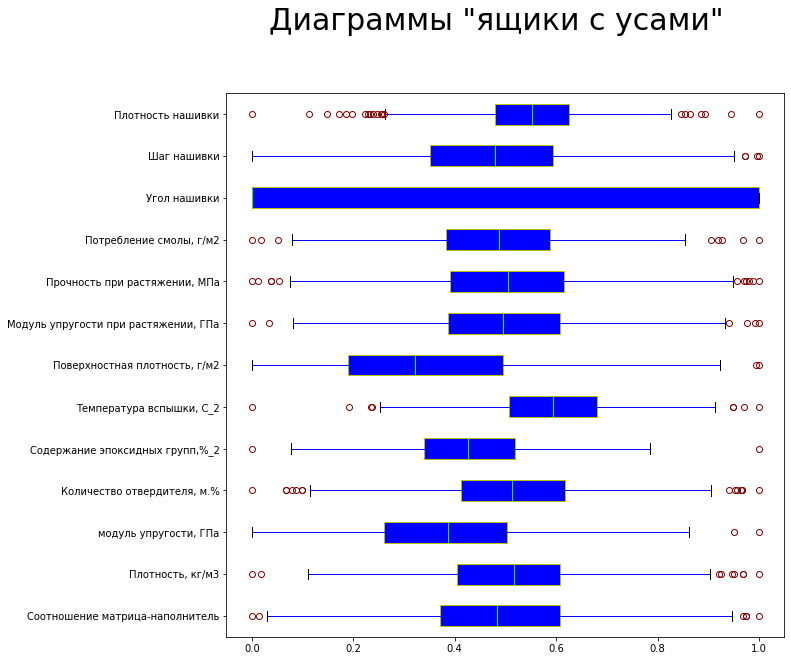

In [ ]:
# "Ящики с усами"(боксплоты)
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize = (10, 10))
plt.suptitle('Диаграммы "ящики с усами"', y = 1,
             fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(df)),
            labels = df.columns,patch_artist = True,
            meanline = True, vert = False,
            boxprops = dict(facecolor = 'b', color = 'y'),
            medianprops = dict(color = 'lime'),
            whiskerprops = dict(color="b"),
            capprops = dict(color = "black"),
            flierprops = dict(color = "b", markeredgecolor = "maroon"))
plt.show()

Наблюдаются выбросы за пределами "усов", исключением является "Угол нашивки"

In [ ]:
# Попарные графики рассеяния точек - скаттерплоты
g = sns.PairGrid(df[df.columns])
g.map(sns.scatterplot, color = 'darkblue')
g.map_upper(sns.scatterplot, color = 'darkblue')
g.map_lower(sns.kdeplot, color = 'darkblue')
plt.show

Output hidden; open in https://colab.research.google.com to view.

Скаттерплоты, аналогично наблюдаются выбросы отдельных точек, корреляции особой нет

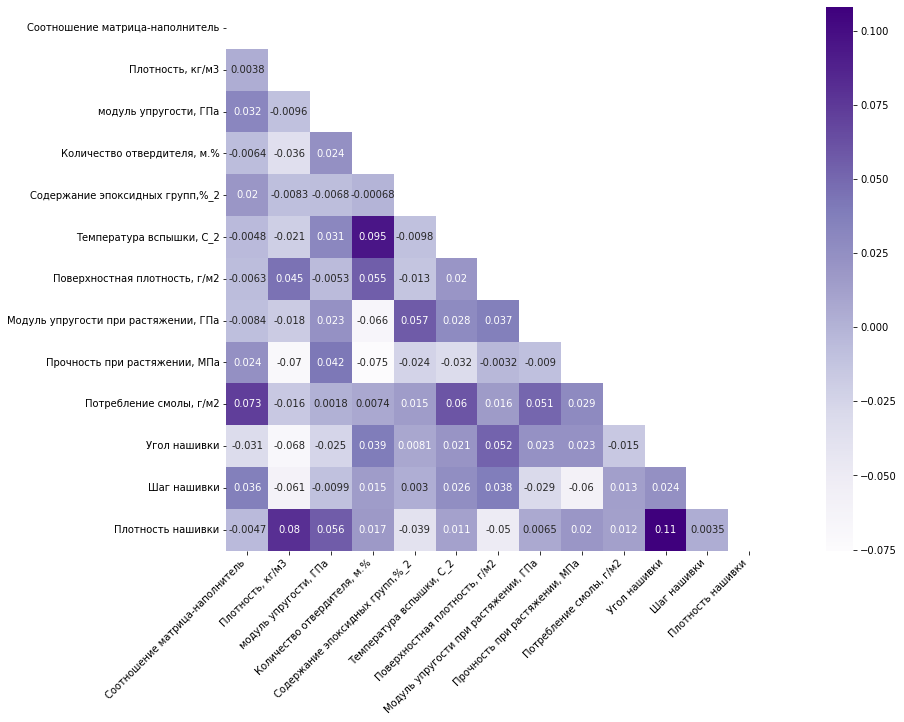

In [ ]:
# График корреляционной матрицы
mask = np.triu(df.corr())
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'Purples')
plt.xticks(rotation = 45, ha='right')
plt.show()

Корреляция входных данных слабая, однако между Углом нашивки и Плотностью нашивки она заметно сильнее.

### Предобработка данных

In [ ]:
# Удаление выбросов методом межквартильных расстояний
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод межквартильных расстояний, выбросов: 93


In [ ]:
# Удаление выбросов методом трёх сигм
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]

    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
print('Метод трёх сигм, выбросов:', count_3s)

Метод трёх сигм, выбросов: 24


Очистим данные от выбросов методом межквартильного расстояния

In [ ]:
# Переменная со списком всех параметров, в которых есть выбросы
df.columns
column_list_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [ ]:
for i in column_list_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

In [ ]:
# Сумма выбросов
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [ ]:
#Удаляем строки c выбросами
df = df.dropna(axis=0)

In [ ]:
# Повтор так, как выбросы ещё оставались
for i in column_list_drop:
    q75, q25 = np.percentile(df.loc[:,i],[75, 25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   1
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    1
Прочность при растяжении, МПа           4
Потребление смолы, г/м2                 1
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       3
dtype: int64

In [ ]:
df = df.dropna(axis=0)

In [ ]:
for i in column_list_drop:
    q75, q25 = np.percentile(df.loc[:,i],[75, 25])
    intr_qr = q75 - q25
    max = q75 + (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)
    df.loc[df[i] < min,i] = np.nan
    df.loc[df[i] > max,i] = np.nan

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           2
Потребление смолы, г/м2                 1
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       1
dtype: int64

In [ ]:
# Повтор
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Теперь выбросов нет, для наглядности отобразим боксплоты

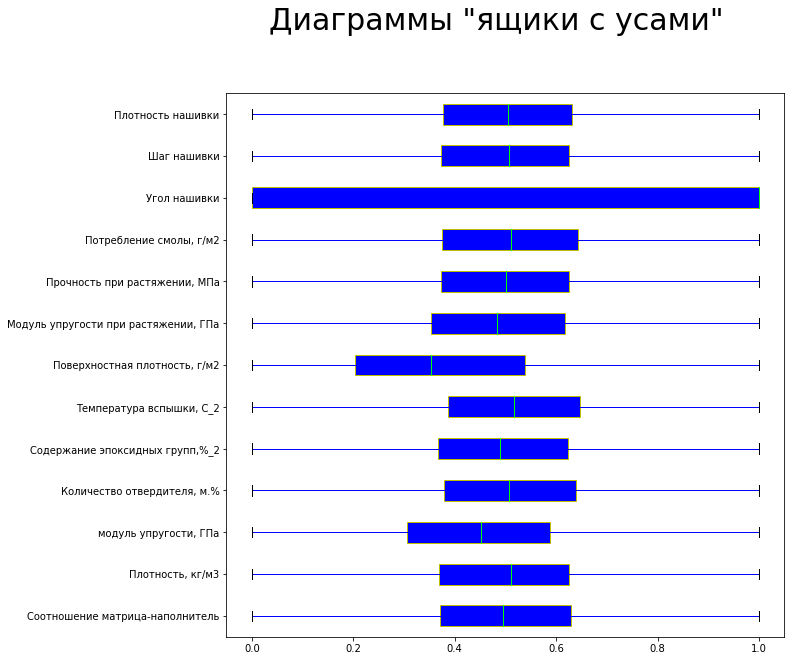

In [ ]:
# "Ящики с усами"(боксплоты)
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize = (10, 10))
plt.suptitle('Диаграммы "ящики с усами"', y = 1 ,
             fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(df)),
            labels = df.columns,patch_artist = True,
            meanline = True, vert = False,
            boxprops = dict(facecolor = 'b', color = 'y'),
            medianprops = dict(color = 'lime'),
            whiskerprops = dict(color="b"),
            capprops = dict(color = "black"),
            flierprops = dict(color = "b", markeredgecolor = "maroon"))
plt.show()

Выбросов не наблюдается

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки                          922 non-null    int64  
 11  Шаг нашивки       

In [ ]:
# Результат без выбросов сохраняем
df.to_excel('/content/drive/MyDrive/result/cleanup_result.xlsx')

df.to_csv('/content/drive/MyDrive/result/cleanup_result.csv', encoding = 'cp1251')

###  Нормализация данных

Приведём единицы измерения показателей к единому виду

<Axes: ylabel='Density'>

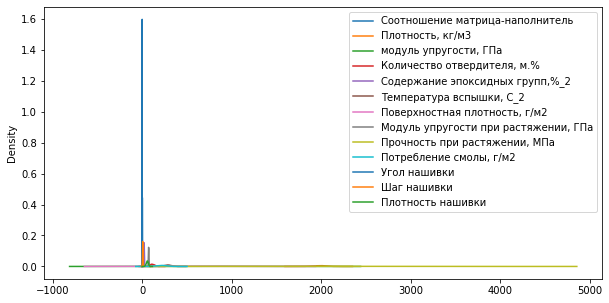

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
df.plot(kind = 'kde', ax = ax)

Как мы видим из графика, данные имеют огромный размах значений.

In [ ]:
# Нормализуем способом MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.499412,0.502904,0.451341,0.506200,0.490578,0.516739,0.373295,0.487343,0.503776,0.507876,0.510846,0.503426,0.503938
std,0.187858,0.188395,0.201534,0.186876,0.180548,0.190721,0.217269,0.196366,0.188668,0.199418,0.500154,0.183587,0.193933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.371909,0.368184,0.305188,0.378514,0.366571,0.386228,0.204335,0.353512,0.373447,0.374647,0.000000,0.372844,0.376869
50%,0.495189,0.511396,0.451377,0.506382,0.488852,0.516931,0.354161,0.483718,0.501481,0.510143,1.000000,0.506414,0.504310
75%,0.629774,0.624719,0.587193,0.638735,0.623046,0.646553,0.538397,0.617568,0.624299,0.642511,1.000000,0.626112,0.630842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Density'>

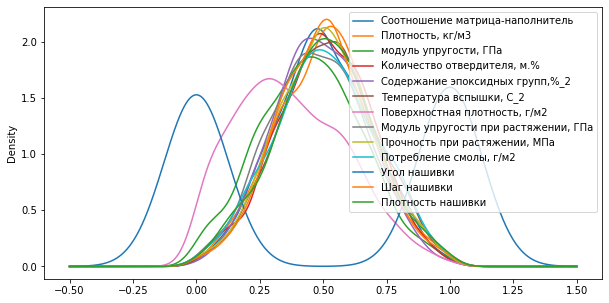

In [ ]:
# Теперь, что покажет график при нормализованных данных
fig, ax = plt.subplots(figsize = (10, 5))
df.plot(kind = 'kde', ax = ax)

In [ ]:
X = df.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
y = df['Модуль упругости при растяжении, ГПа']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


1-й целевой параметр - модуль упругости при растяжении

### Линейная регрессия

In [ ]:
# Обучение модели
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

Модель обучилась

In [ ]:
# Коэффициенты
pd.Series(linear_reg.coef_, index=X_train_scaled.columns).sort_values(ascending=False)

Содержание эпоксидных групп,%_2    0.017928
Потребление смолы, г/м2            0.012458
Угол нашивки                       0.011524
модуль упругости, ГПа              0.007974
Поверхностная плотность, г/м2      0.002020
Плотность нашивки                  0.001561
Температура вспышки, С_2          -0.002096
Плотность, кг/м3                  -0.004133
Шаг нашивки                       -0.006291
Соотношение матрица-наполнитель   -0.010167
Количество отвердителя, м.%       -0.012766
dtype: float64

Коэффициенты b1, показатель содержание эпоксидных групп имеет наибольшее влияние на целевой признак.

In [ ]:
y_train_pred = linear_reg.predict(X_train_scaled)
y_test_pred = linear_reg.predict(X_test_scaled)

MAE_LR_tr = mean_absolute_error(y_train, y_train_pred)
MAE_LR_test = mean_absolute_error(y_test, y_test_pred)
MSE_LR_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_LR_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_LR_tr = r2_score(y_train, y_train_pred)
R2_LR_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.20
TRAIN MAE: 0.16 vs. TEST MAE: 0.16
TRAIN R2: 0.02 vs. TEST R2: -0.03


### Метод опорных векторов SVM

In [ ]:
svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

MAE_SVM_tr = mean_absolute_error(y_train, y_train_pred)
MAE_SVM_test = mean_absolute_error(y_test, y_test_pred)
MSE_SVM_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_SVM_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_SVM_tr = r2_score(y_train, y_train_pred)
R2_SVM_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.12 vs. TEST MSE: 0.23
TRAIN MAE: 0.10 vs. TEST MAE: 0.19
TRAIN R2: 0.61 vs. TEST R2: -0.42


### Метод K-ближайших соседей

In [ ]:
neighbors = KNeighborsRegressor()
neighbors.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
y_train_pred = neighbors.predict(X_train_scaled)
y_test_pred = neighbors.predict(X_test_scaled)

MAE_KNN_tr = mean_absolute_error(y_train, y_train_pred)
MAE_KNN_test = mean_absolute_error(y_test, y_test_pred)
MSE_KNN_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_KNN_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_KNN_tr = r2_score(y_train, y_train_pred)
R2_KNN_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.18 vs. TEST MSE: 0.22
TRAIN MAE: 0.14 vs. TEST MAE: 0.18
TRAIN R2: 0.20 vs. TEST R2: -0.27


### Дерево решений


In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [ ]:
y_train_pred = decision_tree.predict(X_train_scaled)
y_test_pred = decision_tree.predict(X_test_scaled)

MAE_DT_tr = mean_absolute_error(y_train, y_train_pred)
MAE_DT_test = mean_absolute_error(y_test, y_test_pred)
MSE_DT_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_DT_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_DT_tr = r2_score(y_train, y_train_pred)
R2_DT_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.00 vs. TEST MSE: 0.28
TRAIN MAE: 0.00 vs. TEST MAE: 0.23
TRAIN R2: 1.00 vs. TEST R2: -1.12


In [ ]:
# Коэффициенты
pd.Series(decision_tree.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)

Потребление смолы, г/м2            0.162758
Температура вспышки, С_2           0.125363
Соотношение матрица-наполнитель    0.114932
Количество отвердителя, м.%        0.112091
Содержание эпоксидных групп,%_2    0.105683
Поверхностная плотность, г/м2      0.102014
Плотность нашивки                  0.096857
Плотность, кг/м3                   0.084572
модуль упругости, ГПа              0.043553
Шаг нашивки                        0.039500
Угол нашивки                       0.012678
dtype: float64

 Содержание эпоксидных групп.

### Случайный лес

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
y_train_pred = forest.predict(X_train_scaled)
y_test_pred = forest.predict(X_test_scaled)

MAE_RF_tr = mean_absolute_error(y_train, y_train_pred)
MAE_RF_test = mean_absolute_error(y_test, y_test_pred)
MSE_RF_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_RF_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_RF_tr = r2_score(y_train, y_train_pred)
R2_RF_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.07 vs. TEST MSE: 0.21
TRAIN MAE: 0.06 vs. TEST MAE: 0.17
TRAIN R2: 0.86 vs. TEST R2: -0.10


In [ ]:
# Коэффициенты
pd.Series(forest.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)

Потребление смолы, г/м2            0.120877
Количество отвердителя, м.%        0.114786
Плотность, кг/м3                   0.108385
Соотношение матрица-наполнитель    0.098454
Температура вспышки, С_2           0.095787
Содержание эпоксидных групп,%_2    0.094860
Шаг нашивки                        0.094601
Поверхностная плотность, г/м2      0.092062
модуль упругости, ГПа              0.085148
Плотность нашивки                  0.082495
Угол нашивки                       0.012547
dtype: float64

значимым коэффициентом станосится признак потребление смолы

### Многослойный персептрон (MLP)

In [ ]:
MLP = MLPRegressor()
MLP.fit(X_train_scaled, y_train)

MLPRegressor()

In [ ]:
y_train_pred = MLP.predict(X_train_scaled)
y_test_pred = MLP.predict(X_test_scaled)

MAE_MLP_tr = mean_absolute_error(y_train, y_train_pred)
MAE_MLP_test = mean_absolute_error(y_test, y_test_pred)
MSE_MLP_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_MLP_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_MLP_tr = r2_score(y_train, y_train_pred)
R2_MLP_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.16 vs. TEST MSE: 0.23
TRAIN MAE: 0.13 vs. TEST MAE: 0.19
TRAIN R2: 0.33 vs. TEST R2: -0.34


### Сравние модели по метрикам оценки качества

In [ ]:
Metrics_DF ={'Метрика': ["LR", "SVM", "KNN", "DT", "RF", "MLP"], 
         "MAE train": [MAE_LR_tr, MAE_SVM_tr, MAE_KNN_tr, MAE_DT_tr, MAE_RF_tr, MAE_MLP_tr], 
         "MAE test": [MAE_LR_test, MAE_SVM_test, MAE_KNN_test, MAE_DT_test, MAE_RF_test, MAE_MLP_test],
         "MSE train": [MSE_LR_tr, MSE_SVM_tr, MSE_KNN_tr, MSE_DT_tr, MSE_RF_tr, MSE_MLP_tr],
         "MSE test": [MSE_LR_test, MSE_SVM_test, MSE_KNN_test, MSE_DT_test, MSE_RF_test, MSE_MLP_test], 
         "R2 train": [R2_LR_tr, R2_SVM_tr, R2_KNN_tr, R2_DT_tr, R2_RF_tr, R2_MLP_tr], 
         "R2 test": [R2_LR_test, R2_SVM_test, R2_KNN_test, R2_DT_test, R2_RF_test, R2_MLP_test]
         }
Metrics_DF = pd.DataFrame(Metrics_DF)
Metrics_DF.round(2)

,Метрика,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,LR,0.16,0.16,0.19,0.20,0.02,-0.03
1,SVM,0.10,0.19,0.12,0.23,0.61,-0.42
2,KNN,0.14,0.18,0.18,0.22,0.20,-0.27
3,DT,0.00,0.23,0.00,0.28,1.00,-1.12
4,RF,0.06,0.17,0.07,0.21,0.86,-0.10
5,MLP,0.13,0.19,0.16,0.23,0.33,-0.34


На тренировочных данных R2 имеет минус. Метрики MAE и MSE на тренировочных данных меньше, чем на тестовых.

Поиск гиперпараметров по сетке

Гиперпараметры для метода KNN

In [ ]:
GS_KNN = KNeighborsRegressor()
KNN_params = {'n_neighbors' : range(1, 100), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GS = GridSearchCV(GS_KNN,KNN_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X_train_scaled, y_train)
GS_KNN = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 792 candidates, totalling 7920 fits


{'algorithm': 'auto', 'n_neighbors': 41, 'weights': 'uniform'}

In [ ]:
y_train_pred = GS_KNN.predict(X_train_scaled)
y_test_pred = GS_KNN.predict(X_test_scaled)

MAE_KNN_tr = mean_absolute_error(y_train, y_train_pred)
MAE_KNN_test = mean_absolute_error(y_test, y_test_pred)
MSE_KNN_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_KNN_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_KNN_tr = r2_score(y_train, y_train_pred)
R2_KNN_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.20
TRAIN MAE: 0.15 vs. TEST MAE: 0.16
TRAIN R2: 0.05 vs. TEST R2: -0.05


Гиперпараметры для SVR

In [ ]:
GS_SVR = SVR()
SVR_params = {'C' : range (1, 10),
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma' : ['scale', 'auto']
              }
GS = GridSearchCV(GS_SVR, SVR_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X_train_scaled, y_train)
GS_SVR = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'C': 7, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
y_train_pred = GS_SVR.predict(X_train_scaled)
y_test_pred = GS_SVR.predict(X_test_scaled)

MAE_SVM_tr = mean_absolute_error(y_train, y_train_pred)
MAE_SVM_test = mean_absolute_error(y_test, y_test_pred)
MSE_SVM_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_SVM_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_SVM_tr = r2_score(y_train, y_train_pred)
R2_SVM_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.20
TRAIN MAE: 0.16 vs. TEST MAE: 0.16
TRAIN R2: 0.02 vs. TEST R2: -0.05


Гиперпараметры для метода Decision Tree

In [ ]:
GS_DT = DecisionTreeRegressor(random_state=1)
DT_params = {'max_depth' : range (3, 20),
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [2, 6, 10],
              'min_samples_split': [2, 6, 10], 
              'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
              }
GS = GridSearchCV(GS_DT,DT_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X_train_scaled, y_train)
GS_DT = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 1377 candidates, totalling 13770 fits


{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [ ]:
y_train_pred = GS_DT.predict(X_train_scaled)
y_test_pred = GS_DT.predict(X_test_scaled)

MAE_DT_tr = mean_absolute_error(y_train, y_train_pred)
MAE_DT_test = mean_absolute_error(y_test, y_test_pred)
MSE_DT_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_DT_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_DT_tr = r2_score(y_train, y_train_pred)
R2_DT_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.21
TRAIN MAE: 0.15 vs. TEST MAE: 0.17
TRAIN R2: 0.05 vs. TEST R2: -0.11


Гиперпараметры для метода Random Forest

In [ ]:
GS_RF = RandomForestRegressor(random_state=1)
RF_params = {'max_depth' : range (3, 20),
              'n_estimators': [30, 100, 150]
              }
GS = GridSearchCV(GS_RF,RF_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X_train, y_train)
GS_RF = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 51 candidates, totalling 510 fits


{'max_depth': 3, 'n_estimators': 150}

In [ ]:
y_train_pred = GS_RF.predict(X_train)
y_test_pred = GS_RF.predict(X_test)

MAE_RF_tr = mean_absolute_error(y_train, y_train_pred)
MAE_RF_test = mean_absolute_error(y_test, y_test_pred)
MSE_RF_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_RF_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_RF_tr = r2_score(y_train, y_train_pred)
R2_RF_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.18 vs. TEST MSE: 0.20
TRAIN MAE: 0.15 vs. TEST MAE: 0.16
TRAIN R2: 0.13 vs. TEST R2: -0.03


Гиперпараметры для MLP

In [ ]:
GS_MLP = MLPRegressor(random_state=1)
MLP_params = {'hidden_layer_sizes' : (100, 25, 25),
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam']
              }
GS = GridSearchCV(GS_MLP,MLP_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X_train, y_train)
GS_MLP = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'activation': 'logistic', 'hidden_layer_sizes': 100, 'solver': 'sgd'}

In [ ]:
y_train_pred = GS_MLP.predict(X_train)
y_test_pred = GS_MLP.predict(X_test)

MAE_MLP_tr = mean_absolute_error(y_train, y_train_pred)
MAE_MLP_test = mean_absolute_error(y_test, y_test_pred)
MSE_MLP_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_MLP_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_MLP_tr = r2_score(y_train, y_train_pred)
R2_MLP_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.20 vs. TEST MSE: 0.20
TRAIN MAE: 0.16 vs. TEST MAE: 0.16
TRAIN R2: 0.00 vs. TEST R2: -0.02


### Сравнение модели по метрикам

In [ ]:
MetricsGS_DF ={'Метрика': ["LR", "SVM", "KNN", "DT", "RF", "MLP"], 
         "MAE train": [MAE_LR_tr, MAE_SVM_tr, MAE_KNN_tr, MAE_DT_tr, MAE_RF_tr, MAE_MLP_tr], 
         "MAE test": [MAE_LR_test, MAE_SVM_test, MAE_KNN_test, MAE_DT_test, MAE_RF_test, MAE_MLP_test],
         "MSE train": [MSE_LR_tr, MSE_SVM_tr, MSE_KNN_tr, MSE_DT_tr, MSE_RF_tr, MSE_MLP_tr],
         "MSE test": [MSE_LR_test, MSE_SVM_test, MSE_KNN_test, MSE_DT_test, MSE_RF_test, MSE_MLP_test], 
         "R2 train": [R2_LR_tr, R2_SVM_tr, R2_KNN_tr, R2_DT_tr, R2_RF_tr, R2_MLP_tr], 
         "R2 test": [R2_LR_test, R2_SVM_test, R2_KNN_test, R2_DT_test, R2_RF_test, R2_MLP_test]
         }
MetricsGS_DF = pd.DataFrame(MetricsGS_DF)
MetricsGS_DF.round(2)

,Метрика,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,LR,0.16,0.16,0.19,0.20,0.02,-0.03
1,SVM,0.16,0.16,0.19,0.20,0.02,-0.05
2,KNN,0.15,0.16,0.19,0.20,0.05,-0.05
3,DT,0.15,0.17,0.19,0.21,0.05,-0.11
4,RF,0.15,0.16,0.18,0.20,0.13,-0.03
5,MLP,0.16,0.16,0.20,0.20,0.00,-0.02


### Обучение модели для второго целевого признака

2-й целевой параметр - прочность при растяжении

In [ ]:
X = df.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
y = df['Прочность при растяжении, МПа']

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X2_train_scaled = pd.DataFrame(
    scaler.fit_transform(X2_train),
    columns=X2_train.columns,
    index=X2_train.index
)
X2_test_scaled = pd.DataFrame(
    scaler.transform(X2_test),
    columns=X2_test.columns,
    index=X2_test.index
)

### Линейная регрессия

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X2_train_scaled, y2_train)

LinearRegression()

In [ ]:
# Коэффициенты
pd.Series(linear_reg.coef_, index=X2_train_scaled.columns).sort_values(ascending=False)

модуль упругости, ГПа              0.008335
Угол нашивки                       0.007994
Соотношение матрица-наполнитель    0.007438
Потребление смолы, г/м2            0.003342
Плотность нашивки                  0.002849
Содержание эпоксидных групп,%_2    0.000961
Поверхностная плотность, г/м2     -0.001130
Температура вспышки, С_2          -0.003515
Шаг нашивки                       -0.008113
Плотность, кг/м3                  -0.010590
Количество отвердителя, м.%       -0.012447
dtype: float64

модуль упругости значительнее влияет на конечный параметр

In [ ]:
y2_train_pred = linear_reg.predict(X2_train_scaled)
y2_test_pred = linear_reg.predict(X2_test_scaled)

MAE_LR_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_LR_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_LR_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_LR_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_LR_tr = r2_score(y2_train, y2_train_pred)
R2_LR_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.19
TRAIN MAE: 0.15 vs. TEST MAE: 0.15
TRAIN R2: 0.01 vs. TEST R2: 0.01


### Опорные вектора

In [ ]:
svr = SVR()  
svr.fit(X2_train_scaled, y2_train)

SVR()

In [ ]:
y2_train_pred = svr.predict(X2_train_scaled)
y2_test_pred = svr.predict(X2_test_scaled)

MAE_SVM_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_SVM_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_SVM_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_SVM_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_SVM_tr = r2_score(y2_train, y2_train_pred)
R2_SVM_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.12 vs. TEST MSE: 0.21
TRAIN MAE: 0.10 vs. TEST MAE: 0.16
TRAIN R2: 0.62 vs. TEST R2: -0.25


### Метод k-ближайших соседей

In [ ]:
neighbors = KNeighborsRegressor()
neighbors.fit(X2_train_scaled, y2_train)

KNeighborsRegressor()

In [ ]:
y2_train_pred = neighbors.predict(X2_train)
y2_test_pred = neighbors.predict(X2_test)

MAE_KNN_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_KNN_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_KNN_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_KNN_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_KNN_tr = r2_score(y2_train, y2_train_pred)
R2_KNN_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.21 vs. TEST MSE: 0.19
TRAIN MAE: 0.17 vs. TEST MAE: 0.15
TRAIN R2: -0.20 vs. TEST R2: -0.05


### Дерево решений

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X2_train_scaled, y2_train)

DecisionTreeRegressor()

In [ ]:
y2_train_pred = decision_tree.predict(X2_train_scaled)
y2_test_pred = decision_tree.predict(X2_test_scaled)

MAE_DT_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_DT_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_DT_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_DT_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_DT_tr = r2_score(y2_train, y2_train_pred)
R2_DT_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.00 vs. TEST MSE: 0.28
TRAIN MAE: 0.00 vs. TEST MAE: 0.22
TRAIN R2: 1.00 vs. TEST R2: -1.22


In [ ]:
# Коэффициенты
pd.Series(decision_tree.feature_importances_, index=X2_train_scaled.columns).sort_values(ascending=False)

Поверхностная плотность, г/м2      0.160183
Содержание эпоксидных групп,%_2    0.109988
Температура вспышки, С_2           0.101084
Соотношение матрица-наполнитель    0.096159
модуль упругости, ГПа              0.093761
Количество отвердителя, м.%        0.092032
Плотность, кг/м3                   0.091192
Плотность нашивки                  0.090706
Шаг нашивки                        0.082659
Потребление смолы, г/м2            0.077767
Угол нашивки                       0.004469
dtype: float64

Весомый парметр Поверхностная плотность

### Случайный лес

In [ ]:
forest = RandomForestRegressor()
forest.fit(X2_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
y2_train_pred = forest.predict(X_train_scaled)
y2_test_pred = forest.predict(X_test_scaled)

MAE_RF_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_RF_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_RF_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_RF_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_RF_tr = r2_score(y2_train, y2_train_pred)
R2_RF_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.23 vs. TEST MSE: 0.20
TRAIN MAE: 0.18 vs. TEST MAE: 0.16
TRAIN R2: -0.45 vs. TEST R2: -0.10


In [ ]:
# Коэффициенты
pd.Series(forest.feature_importances_, index=X2_train_scaled.columns).sort_values(ascending=False)

Потребление смолы, г/м2            0.118426
Количество отвердителя, м.%        0.113204
Плотность, кг/м3                   0.108567
Содержание эпоксидных групп,%_2    0.106487
Поверхностная плотность, г/м2      0.098052
Температура вспышки, С_2           0.095314
Соотношение матрица-наполнитель    0.092691
Шаг нашивки                        0.090698
Плотность нашивки                  0.084495
модуль упругости, ГПа              0.078645
Угол нашивки                       0.013423
dtype: float64

Весомый параметр количество отвердителя.

### Многослойный персептрон (MLP)

In [ ]:
MLP = MLPRegressor()
MLP.fit(X2_train_scaled, y2_train)

MLPRegressor()

In [ ]:
y2_train_pred = MLP.predict(X2_train_scaled)
y2_test_pred = MLP.predict(X2_test_scaled)

MAE_MLP_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_MLP_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_MLP_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_MLP_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_MLP_tr = r2_score(y2_train, y2_train_pred)
R2_MLP_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.16 vs. TEST MSE: 0.22
TRAIN MAE: 0.13 vs. TEST MAE: 0.17
TRAIN R2: 0.24 vs. TEST R2: -0.37


Сравнение модели по метрикам оценки качества

In [ ]:
Metrics2_DF ={'Метрика': ["LR", "SVM", "KNN", "DT", "RF", "MLP"], 
         "MAE train": [MAE_LR_tr, MAE_SVM_tr, MAE_KNN_tr, MAE_DT_tr, MAE_RF_tr, MAE_MLP_tr], 
         "MAE test": [MAE_LR_test, MAE_SVM_test, MAE_KNN_test, MAE_DT_test, MAE_RF_test, MAE_MLP_test],
         "MSE train": [MSE_LR_tr, MSE_SVM_tr, MSE_KNN_tr, MSE_DT_tr, MSE_RF_tr, MSE_MLP_tr],
         "MSE test": [MSE_LR_test, MSE_SVM_test, MSE_KNN_test, MSE_DT_test, MSE_RF_test, MSE_MLP_test], 
         "R2 train": [R2_LR_tr, R2_SVM_tr, R2_KNN_tr, R2_DT_tr, R2_RF_tr, R2_MLP_tr], 
         "R2 test": [R2_LR_test, R2_SVM_test, R2_KNN_test, R2_DT_test, R2_RF_test, R2_MLP_test]
         }
Metrics2_DF = pd.DataFrame(Metrics2_DF)
Metrics2_DF.round(2)

,Метрика,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,LR,0.15,0.15,0.19,0.19,0.01,0.01
1,SVM,0.10,0.16,0.12,0.21,0.62,-0.25
2,KNN,0.17,0.15,0.21,0.19,-0.20,-0.05
3,DT,0.00,0.22,0.00,0.28,1.00,-1.22
4,RF,0.18,0.16,0.23,0.20,-0.45,-0.10
5,MLP,0.13,0.17,0.16,0.22,0.24,-0.37


2-й параметр - прочность при растяжении-плохая обучаемость моделей. Коэффициент детерминации R2, почти все значения отрицательные на тестах.

Поиск гиперпараметров по сетке

Гиперпараметры для метода KNN

In [ ]:
GS_KNN = KNeighborsRegressor()
KNN_params = {'n_neighbors' : range(1, 100), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GS = GridSearchCV(GS_KNN,KNN_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X2_train_scaled, y2_train)
GS_KNN = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 792 candidates, totalling 7920 fits


{'algorithm': 'brute', 'n_neighbors': 57, 'weights': 'distance'}

In [ ]:
#подставим значения гиперпараметров в исходную модель и выведем метрики оценки качества модели
y2_train_pred = GS_KNN.predict(X2_train)
y2_test_pred = GS_KNN.predict(X2_test)

MAE_KNN_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_KNN_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_KNN_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_KNN_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_KNN_tr = r2_score(y2_train, y2_train_pred)
R2_KNN_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.19
TRAIN MAE: 0.15 vs. TEST MAE: 0.15
TRAIN R2: -0.02 vs. TEST R2: 0.00


Гиперпараметры для метода SVR

In [ ]:
GS_SVR = SVR()
SVR_params = {'C' : range (1, 10),
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma' : ['scale', 'auto']
              }
GS = GridSearchCV(GS_SVR, SVR_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X2_train_scaled, y2_train)
GS_SVR = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'C': 7, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
y2_train_pred = GS_SVR.predict(X2_train_scaled)
y2_test_pred = GS_SVR.predict(X2_test_scaled)

MAE_SVM_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_SVM_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_SVM_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_SVM_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_SVM_tr = r2_score(y2_train, y2_train_pred)
R2_SVM_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.19
TRAIN MAE: 0.15 vs. TEST MAE: 0.15
TRAIN R2: 0.01 vs. TEST R2: 0.00


Гиперпараметры для метода Decision Tree

In [ ]:
GS_DT = DecisionTreeRegressor(random_state=1)
DT_params = {'max_depth' : range (3, 20),
              'min_samples_leaf': [2, 6, 10],
              'min_samples_split': [2, 6, 10], 
              'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
              }
GS = GridSearchCV(GS_DT,DT_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X2_train_scaled, y2_train)
GS_DT = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 459 candidates, totalling 4590 fits


{'criterion': 'absolute_error',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [ ]:
y2_train_pred = GS_DT.predict(X2_train_scaled)
y2_test_pred = GS_DT.predict(X2_test_scaled)

MAE_DT_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_DT_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_DT_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_DT_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_DT_tr = r2_score(y2_train, y2_train_pred)
R2_DT_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.18 vs. TEST MSE: 0.19
TRAIN MAE: 0.14 vs. TEST MAE: 0.16
TRAIN R2: 0.05 vs. TEST R2: -0.05


Гиперпараметры для метода Random Forest

In [ ]:
GS_RF = RandomForestRegressor(random_state=1)
RF_params = {'max_depth' : range (3, 20),
              'n_estimators': [30, 100, 150]
              }
GS = GridSearchCV(GS_RF,RF_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X2_train_scaled, y2_train)
GS_RF = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 51 candidates, totalling 510 fits


{'max_depth': 3, 'n_estimators': 150}

In [ ]:
#подставим значения гиперпараметров в исходную модель и выведем метрики оценки качества модели
y2_train_pred = GS_RF.predict(X2_train_scaled)
y2_test_pred = GS_RF.predict(X2_test_scaled)

MAE_RF_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_RF_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_RF_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_RF_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_RF_tr = r2_score(y2_train, y2_train_pred)
R2_RF_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.18 vs. TEST MSE: 0.19
TRAIN MAE: 0.14 vs. TEST MAE: 0.15
TRAIN R2: 0.12 vs. TEST R2: -0.00


Гиперпараметры для MLP

In [ ]:
GS_MLP = MLPRegressor(random_state=1)
MLP_params = {'hidden_layer_sizes' : (100, 25, 25),
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam']
              }
GS = GridSearchCV(GS_MLP,MLP_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X2_train_scaled, y2_train)
GS_MLP = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'activation': 'logistic', 'hidden_layer_sizes': 25, 'solver': 'adam'}

In [ ]:
y2_train_pred = GS_MLP.predict(X2_train_scaled)
y2_test_pred = GS_MLP.predict(X2_test_scaled)

MAE_MLP_tr = mean_absolute_error(y2_train, y2_train_pred)
MAE_MLP_test = mean_absolute_error(y2_test, y2_test_pred)
MSE_MLP_tr = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
MSE_MLP_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
R2_MLP_tr = r2_score(y2_train, y2_train_pred)
R2_MLP_test = r2_score(y2_test, y2_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y2_train, y2_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y2_test, y2_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y2_train, y2_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y2_test, y2_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.19
TRAIN MAE: 0.15 vs. TEST MAE: 0.15
TRAIN R2: 0.02 vs. TEST R2: 0.01


### Сравнение модели по метрикам оценки качества

In [ ]:
MetricsGS_DF ={'Метрика': ["LR", "SVM", "KNN", "DT", "RF", "MLP"], 
         "MAE train": [MAE_LR_tr, MAE_SVM_tr, MAE_KNN_tr, MAE_DT_tr, MAE_RF_tr, MAE_MLP_tr], 
         "MAE test": [MAE_LR_test, MAE_SVM_test, MAE_KNN_test, MAE_DT_test, MAE_RF_test, MAE_MLP_test],
         "MSE train": [MSE_LR_tr, MSE_SVM_tr, MSE_KNN_tr, MSE_DT_tr, MSE_RF_tr, MSE_MLP_tr],
         "MSE test": [MSE_LR_test, MSE_SVM_test, MSE_KNN_test, MSE_DT_test, MSE_RF_test, MSE_MLP_test], 
         "R2 train": [R2_LR_tr, R2_SVM_tr, R2_KNN_tr, R2_DT_tr, R2_RF_tr, R2_MLP_tr], 
         "R2 test": [R2_LR_test, R2_SVM_test, R2_KNN_test, R2_DT_test, R2_RF_test, R2_MLP_test]
         }
MetricsGS_DF = pd.DataFrame(MetricsGS_DF)
MetricsGS_DF.round(2)

,Метрика,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,LR,0.15,0.15,0.19,0.19,0.01,0.01
1,SVM,0.15,0.15,0.19,0.19,0.01,0.00
2,KNN,0.15,0.15,0.19,0.19,-0.02,0.00
3,DT,0.14,0.16,0.18,0.19,0.05,-0.05
4,RF,0.14,0.15,0.18,0.19,0.12,-0.00
5,MLP,0.15,0.15,0.19,0.19,0.02,0.01


Нейронные сети

### Нейронная сеть, которая будет рекомендовать соотношение «матрица – наполнитель»

In [ ]:
X = df.drop(columns=['Соотношение матрица-наполнитель'])
y = df['Соотношение матрица-наполнитель']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.inverse_transform(X_train_scaled)
scaler.inverse_transform(X_test_scaled)

array([[0.5547329 , 0.06154982, 0.72735966, ..., 1.        , 0.49082875,
        0.56192749],
       [0.46811869, 0.40711694, 0.40388552, ..., 1.        , 0.52530313,
        0.66734505],
       [0.34048588, 0.32781812, 0.53776247, ..., 1.        , 0.83283053,
        0.448136  ],
       ...,
       [0.38504864, 0.70212606, 0.85840518, ..., 0.        , 0.32919773,
        0.60442182],
       [0.60540832, 0.3277064 , 0.43436546, ..., 1.        , 0.55791545,
        0.5236293 ],
       [0.76295525, 0.80542149, 0.55276601, ..., 1.        , 0.38159716,
        0.60532983]])

In [ ]:
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', 
                                  values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(Dense(units=hp.Int('units_input',    # Полносвязный слой с разным количеством нейронов
                                   min_value=16,    # мин. количество нейронов
                                   max_value=100,   # макc. количество
                                   step=16),
                    input_dim=12,
                    activation=activation_choice))
    model.add(Dense(units=hp.Int('units_hidden',        
                                   min_value=16,   
                                   max_value=100,   
                                   step=16),
                    activation=activation_choice))   
    model.add(Dense(1))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop']),
        loss=[tf.keras.losses.MeanAbsoluteError()],
        metrics=[tf.keras.metrics.MeanSquaredError()]
    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,                 # функция создания модели
    objective=['val_accuracy'],
    max_trials=30,               # максимальное количество запусков обучения 
    directory='test_directory'   # каталог, куда сохраняются обученные сети  
    )

In [ ]:
#пространство поиска гиперпараметров
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 100, 'step': 16, 'sampling': 'linear'}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 100, 'step': 16, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
#подбор гиперпараметров
tuner.search(X_train_scaled,                  # Данные для обучения
             y_train,                  # Правильные ответы
             batch_size=128,           # Размер мини-выборки
             epochs=30,                # Количество эпох обучения 
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
             verbose=1, #показываем прогресс обучения
             )

Trial 30 Complete [00h 00m 03s]
multi_objective: 0.0

Best multi_objective So Far: 0.0
Total elapsed time: 00h 02m 20s


In [ ]:
models = tuner.get_best_models(num_models=3) #три лучшие модели

In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test_scaled, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 2ms/step - loss: 0.2045 - mean_squared_error: 0.0636

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
        

In [ ]:
#вторая модель лучше
best_keras_model = models[1]

y_train_pred = best_keras_model.predict(X_train_scaled)
y_test_pred = best_keras_model.predict(X_test_scaled)

MAE_KM_tr = mean_absolute_error(y_train, y_train_pred)
MAE_KM_test = mean_absolute_error(y_test, y_test_pred)
MSE_KM_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_KM_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_KM_tr = r2_score(y_train, y_train_pred)
R2_KM_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

9/9 [==============================] - 0s 3ms/step
TRAIN MSE: 0.19 vs. TEST MSE: 0.19
TRAIN MAE: 0.15 vs. TEST MAE: 0.16
TRAIN R2: -0.02 vs. TEST R2: -0.02


нейросеть на базе sklearn

In [ ]:
GS_MLP = MLPRegressor(random_state=1)
MLP_params = {'hidden_layer_sizes' : [(100, 25, 25), (150, 40, 26)],
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam']
              }
GS = GridSearchCV(GS_MLP, MLP_params, cv = 10, verbose = 1, n_jobs=-1)
GS.fit(X_train_scaled, y_train)
GS_MLP = GS.best_estimator_
GS.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'activation': 'logistic',
 'hidden_layer_sizes': (100, 25, 25),
 'solver': 'lbfgs'}

In [ ]:
y_train_pred = GS_MLP.predict(X_train_scaled)
y_test_pred = GS_MLP.predict(X_test_scaled)

MAE_MLP2_tr = mean_absolute_error(y_train, y_train_pred)
MAE_MLP2_test = mean_absolute_error(y_test, y_test_pred)
MSE_MLP2_tr = np.sqrt(mean_squared_error(y_train, y_train_pred))
MSE_MLP2_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
R2_MLP2_tr = r2_score(y_train, y_train_pred)
R2_MLP2_test = r2_score(y_test, y_test_pred)

print(f'TRAIN MSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} vs. '
      f'TEST MSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')
print(f'TRAIN MAE: {mean_absolute_error(y_train, y_train_pred):.2f} vs. '
      f'TEST MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'TRAIN R2: {r2_score(y_train, y_train_pred):.2f} vs. '
      f'TEST R2: {r2_score(y_test, y_test_pred):.2f}')

TRAIN MSE: 0.19 vs. TEST MSE: 0.19
TRAIN MAE: 0.15 vs. TEST MAE: 0.16
TRAIN R2: 0.00 vs. TEST R2: -0.00


Показатели качества у нейросетей при помощи keras и sklearn.

In [ ]:
Metrics3_DF ={'Метрика': ["KM", "MLP"], 
         "MAE train": [MAE_KM_tr, MAE_MLP2_tr], 
         "MAE test": [MAE_KM_test, MAE_MLP2_test],
         "MSE train": [MSE_KM_tr, MSE_MLP2_tr],
         "MSE test": [MSE_KM_test, MSE_MLP2_test], 
         "R2 train": [R2_KM_tr, R2_MLP2_tr], 
         "R2 test": [R2_KM_test, R2_MLP2_test]
         }
Metrics3_DF = pd.DataFrame(Metrics3_DF)
Metrics3_DF.round(2)

,Метрика,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,KM,0.15,0.16,0.19,0.19,-0.02,-0.02
1,MLP,0.15,0.16,0.19,0.19,0.00,-0.00


In [ ]:
X_train.columns

Index(['Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
       'Потребление смолы, г/м2', 'Угол нашивки', 'Шаг нашивки',
       'Плотность нашивки'],
      dtype='object')

In [ ]:
y_test_pred

array([0.49949819, 0.49965341, 0.49908711, 0.50013589, 0.4998184 ,
       0.50006967, 0.49931006, 0.50001137, 0.50000886, 0.50099915,
       0.50032724, 0.50085773, 0.49996693, 0.50023986, 0.5000779 ,
       0.49962839, 0.4998077 , 0.5001951 , 0.50022929, 0.50031202,
       0.500185  , 0.49963873, 0.50036072, 0.499545  , 0.49915508,
       0.49913961, 0.5001295 , 0.50022171, 0.49954984, 0.49985916,
       0.500044  , 0.50056217, 0.50039623, 0.49957272, 0.50021429,
       0.49995321, 0.50048083, 0.49974081, 0.49985717, 0.49994373,
       0.50005762, 0.50026564, 0.49944331, 0.50050717, 0.50059436,
       0.4998677 , 0.50030937, 0.50050426, 0.49881482, 0.49984115,
       0.50009801, 0.49983707, 0.50018474, 0.49984448, 0.5005792 ,
       0.5003905 , 0.50045773, 0.49946664, 0.50033415, 0.49991113,
       0.4996774 , 0.49968676, 0.49869527, 0.50098566, 0.50003844,
       0.50034874, 0.49949037, 0.50032148, 0.49886051, 0.49986435,
       0.50009668, 0.50018001, 0.50042563, 0.49969032, 0.50020

Сохраняем модель для flack приложения

In [ ]:
pickle.dump(GS_MLP, open('COMPO_model.pkl', 'wb')) 

In [ ]:
model_load = pickle.load(open('COMPO_model.pkl', 'rb'))

In [ ]:
model_load.predict(X_test_scaled)

array([0.49949819, 0.49965341, 0.49908711, 0.50013589, 0.4998184 ,
       0.50006967, 0.49931006, 0.50001137, 0.50000886, 0.50099915,
       0.50032724, 0.50085773, 0.49996693, 0.50023986, 0.5000779 ,
       0.49962839, 0.4998077 , 0.5001951 , 0.50022929, 0.50031202,
       0.500185  , 0.49963873, 0.50036072, 0.499545  , 0.49915508,
       0.49913961, 0.5001295 , 0.50022171, 0.49954984, 0.49985916,
       0.500044  , 0.50056217, 0.50039623, 0.49957272, 0.50021429,
       0.49995321, 0.50048083, 0.49974081, 0.49985717, 0.49994373,
       0.50005762, 0.50026564, 0.49944331, 0.50050717, 0.50059436,
       0.4998677 , 0.50030937, 0.50050426, 0.49881482, 0.49984115,
       0.50009801, 0.49983707, 0.50018474, 0.49984448, 0.5005792 ,
       0.5003905 , 0.50045773, 0.49946664, 0.50033415, 0.49991113,
       0.4996774 , 0.49968676, 0.49869527, 0.50098566, 0.50003844,
       0.50034874, 0.49949037, 0.50032148, 0.49886051, 0.49986435,
       0.50009668, 0.50018001, 0.50042563, 0.49969032, 0.50020